# Exploração dos dados de suicídios no Brasil

Fonte dos dados: [OpenDataSUS](https://opendatasus.saude.gov.br/dataset/sim/resource/b894426e-83dc-4703-91f8-fe90d9b7f8f0)

## Importar Biliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carregar arquivos CSV

In [2]:
# Lista de anos (adiciona à lista os anos que estão sendo analisados)
anos = ['21', '22', '23']

# Lista de arquivos csv que serão analisados
arquivos_csv = []

for ano in anos:
    arquivos_csv.append(f'do{ano}.csv')

# Definir separador dos dados do seu arquivo
sep = ';'

# Definir se quer low_memory
low_memory = False

# Loop para leitura e criação de dataframes
for ano, arq in zip(anos, arquivos_csv):
    globals()[f'df{ano}'] = pd.read_csv(f'/kaggle/input/dados-sucicdios-opendatasus/{arq}', sep=sep)

/tmp/ipykernel_18/1004508102.py:18: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f'df{ano}'] = pd.read_csv(f'/kaggle/input/dados-sucicdios-opendatasus/{arq}', sep=sep)
/tmp/ipykernel_18/1004508102.py:18: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f'df{ano}'] = pd.read_csv(f'/kaggle/input/dados-sucicdios-opendatasus/{arq}', sep=sep)
/tmp/ipykernel_18/1004508102.py:18: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[f'df{ano}'] = pd.read_csv(f'/kaggle/input/dados-sucicdios-opendatasus/{arq}', sep=sep)


## Dataframes criados

In [3]:
# Printar os dataframes criados anteriormente
print(arquivos_csv)

['do21.csv', 'do22.csv', 'do23.csv']


## Informações de cada Dataframe criado

In [4]:
# Informações sobre os datasets criados

for ano in anos:
    print(globals()[f'df{ano}'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832649 entries, 0 to 1832648
Data columns (total 87 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ORIGEM      int64  
 1   TIPOBITO    int64  
 2   DTOBITO     int64  
 3   HORAOBITO   float64
 4   NATURAL     float64
 5   CODMUNNATU  float64
 6   DTNASC      float64
 7   IDADE       int64  
 8   SEXO        int64  
 9   RACACOR     float64
 10  ESTCIV      float64
 11  ESC         float64
 12  ESC2010     float64
 13  SERIESCFAL  float64
 14  OCUP        float64
 15  CODMUNRES   int64  
 16  LOCOCOR     int64  
 17  CODESTAB    float64
 18  ESTABDESCR  float64
 19  CODMUNOCOR  int64  
 20  IDADEMAE    float64
 21  ESCMAE      float64
 22  ESCMAE2010  float64
 23  SERIESCMAE  float64
 24  OCUPMAE     float64
 25  QTDFILVIVO  float64
 26  QTDFILMORT  float64
 27  GRAVIDEZ    float64
 28  SEMAGESTAC  float64
 29  GESTACAO    float64
 30  PARTO       float64
 31  OBITOPARTO  float64
 32  PESO        float64
 33  TPMORTE

## Pré-visualização de cada Dataframe criado

In [5]:
# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Heads dos datasets criados
'''
# "Descomentar" essa parte caso queira printar os heads de cada dataframe criado
for ano in anos:
    print(globals()[f'df{ano}'].head())
'''
# Head de um dataset
df22.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CB_PRE,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,21042022,1230.0,835.0,355030.0,29041922.0,499,2,1.0,3.0,4.0,3.0,3.0,999992.0,354850,3,NaN,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,*I219,*I709*I251,*I10X,*I119,*R54X,I219,NaN,354850.0,22042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,I219,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,I219/I709 I251/I10/I119*R54,4052022,NaN,NaN,6.0,0.0,1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2,22042022,1203.0,827.0,270770.0,5071948.0,473,2,1.0,2.0,4.0,2.0,8.0,999992.0,354850,3,NaN,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,*A419,*J180,*N390,*I693,*K573*I709*E149*G319*R268,I693,NaN,354850.0,23042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,I693,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,A419/J180/N390/I693*K573 I709 E149 G319 R268,4052022,NaN,NaN,4.0,0.0,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,2,22042022,1525.0,835.0,354850.0,10101952.0,469,1,2.0,4.0,4.0,3.0,3.0,516335.0,354850,2,7872593.0,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,*A419,*J690,*N390,*N133,*K253*F03X*I10X,N133,NaN,354850.0,23042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,N133,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,A419/J690/N390/N133*K253 F03 I10,4052022,NaN,NaN,6.0,0.0,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1,2,23042022,937.0,835.0,350750.0,25061938.0,483,1,1.0,2.0,5.0,5.0,NaN,261125.0,354850,3,NaN,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,*I269,*I802,*I739,*G309,*G319*N390*R268*J180*F172*I694,I739,NaN,354850.0,23042022.0,NaN,NaN,NaN,20220025.0,S,2052022.0,I739,29042022.0,4.0,S,S,3.2.30,3.4,5.0,4052022.0,I269/I802/I739/G309*G319 N390 R268 J180 F172 I694,4052022,NaN,NaN,8.0,0.0,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,1,2,20042022,1351.0,829.0,291400.0,18101956.0,465,2,1.0,3.0,3.0,2.0,NaN,999992.0,355100,1,2081636.0,NaN,354850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,*J189,NaN,*I10X,*I259,*A483,I259,NaN,NaN,20042022.0,NaN,NaN,NaN,20220025.0,N,NaN,I259,29042022.0,1.0,S,S,3.2.30,3.4,NaN,4052022.0,J189/ /I10/I259*A483,4052022,NaN,NaN,11.0,0.0,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


# Causas e Circunstâncias de Suicídios

#### Suicídios
Óbitos provocados pela própria vítima. Dados adquiridos pelos códigos da CID-10:
- **X60**–**X84** (Lesões autoprovocadas intencionalmente)–
  - Subgrupo: **X600**-**X840**




In [6]:
# Criar dicinários com definicões do códigos CID das causas
dic_codigo_cid_def = {
    "X60-X84": {  # Group X60 to X84
        "X060": "Auto-intoxicação p/exposição intencional a analgesicos antipiréticosanti-reumáticos não-opiáceos",
        "X061": "Auto-intox p/ exp intenc droga anticonvulsivante sedat hipnótico antiparkinsoniano psicotropico ncop",
        "X062": "Auto-intoxicação p/ exposição intencional narcótico psicodisleptico (alucinógenos) ncop",
        "X063": "Auto-intoxicação p/ exposição intencional outras subst farmacológicas de ação sobre o sna",
        "X064": "Auto-intoxicação p/exposição intencional outras drogas medicamentos e subst biológicas e as ne",
        "X065": "Auto-intoxicação voluntária por álcool",
        "X066": "Auto-intoxicação intencional por solventes orgânicos hidrocarbonetos halogenados e seus vapores",
        "X067": "Auto-intoxicação intencional por outros gases e vapores",
        "X068": "Auto-intoxicação por e exposição intencional a pesticidas",
        "X069": "Auto-intoxicação p/exposição intencional a outros produtos quimicos e substâncias nocivas ne",
        "X070": "Lesão autoprovocada intencionalmente por enforcamento estrangulamento e sufocação",
        "X071": "Lesão autoprovocada intencionalmente por afogamento e submersão",
        "X072": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão",
        "X073": "Lesão autoprovocada intencionalmente p/ disparo espingarda carabina ou arma de fogo de maior calibre",
        "X074": "Lesão autoprovocada intencionalmente p/ disparo de arma de fogo e de arma de fogo não especificada",
        "X075": "Lesão autoprovocada intencionalmente por dispositivos explosivos",
        "X076": "Lesão autoprovocada intencionalmente pela fumaca pelo fogo e por chamas",
        "X077": "Lesão autoprovocada intencionalmente por vapor de água gases ou objetos quentes",
        "X078": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante",
        "X079": "Lesão autoprovocada intencionalmente por objeto contundente",
        "X080": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado",
        "X081": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de objeto em movimento",
        "X082": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor",
        "X083": "Lesão autoprovocada intencionalmente por outros meios especificados",
        "X084": "Lesão autoprovocada intencionalmente por meios não especificados",
        "X60": "Auto-intoxicação p/exposição intencional a analgesicos antipiréticosanti-reumáticos não-opiáceos",
        "X61": "Auto-intox p/ exp intenc droga anticonvulsivante sedat hipnótico antiparkinsoniano psicotropico ncop",
        "X62": "Auto-intoxicação p/ exposição intencional narcótico psicodisleptico (alucinógenos) ncop",
        "X63": "Auto-intoxicação p/ exposição intencional outras subst farmacológicas de ação sobre o sna",
        "X64": "Auto-intoxicação p/exposição intencional outras drogas medicamentos e subst biológicas e as ne",
        "X65": "Auto-intoxicação voluntária por álcool",
        "X66": "Auto-intoxicação intencional por solventes orgânicos hidrocarbonetos halogenados e seus vapores",
        "X67": "Auto-intoxicação intencional por outros gases e vapores",
        "X68": "Auto-intoxicação por e exposição intencional a pesticidas",
        "X69": "Auto-intoxicação p/exposição intencional a outros produtos quimicos e substâncias nocivas ne",
        "X70": "Lesão autoprovocada intencionalmente por enforcamento estrangulamento e sufocação",
        "X71": "Lesão autoprovocada intencionalmente por afogamento e submersão",
        "X72": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão",
        "X73": "Lesão autoprovocada intencionalmente p/ disparo espingarda carabina ou arma de fogo de maior calibre",
        "X74": "Lesão autoprovocada intencionalmente p/ disparo de arma de fogo e de arma de fogo não especificada",
        "X75": "Lesão autoprovocada intencionalmente por dispositivos explosivos",
        "X76": "Lesão autoprovocada intencionalmente pela fumaca pelo fogo e por chamas",
        "X77": "Lesão autoprovocada intencionalmente por vapor de água gases ou objetos quentes",
        "X78": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante",
        "X79": "Lesão autoprovocada intencionalmente por objeto contundente",
        "X80": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado",
        "X81": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de objeto em movimento",
        "X82": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor",
        "X83": "Lesão autoprovocada intencionalmente por outros meios especificados",
        "X84": "Lesão autoprovocada intencionalmente por meios não especificados",
    },
    "X600-X840": {  # Group X600 to X840
        "X600": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - residência",
        "X601": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - habitação coletiva",
        "X602": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - escolas, outras instituições e áreas de administração pública",
        "X603": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - área para a prática de esportes e atletismo",
        "X604": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - rua e estrada",
        "X605": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - áreas de comércio e de serviços",
        "X606": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - áreas industriais e em construção",
        "X607": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - fazenda",
        "X608": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - outros locais especificados",
        "X609": "Auto-intoxicação por e exposição, intencional, a analgésicos, antipiréticos e anti-reumáticos, não-opiáceos - local não especificado",
        "X610": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - residência",
        "X611": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - habitação coletiva",
        "X612": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - escolas, outras instituições e áreas de administração pública",
        "X613": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - área para a prática de esportes e atletismo",
        "X614": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - rua e estrada",
        "X615": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - áreas de comércio e de serviços",
        "X616": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - áreas industriais e em construção",
        "X617": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - fazenda",
        "X618": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - outros locais especificados",
        "X619": "Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte - local não especificado",
        "X620": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - residência",
        "X621": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - habitação coletiva",
        "X622": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - escolas, outras instituições e áreas de administração pública",
        "X623": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - área para a prática de esportes e atletismo",
        "X624": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - rua e estrada",
        "X625": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - áreas de comércio e de serviços",
        "X626": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - áreas industriais e em construção",
        "X627": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - fazenda",
        "X628": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - outros locais especificados",
        "X629": "Auto-intoxicação por e exposição, intencional, a narcóticos e psicodislépticos [alucinógenos] não classificados em outra parte - local não especificado",
        "X630": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - residência",
        "X631": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - habitação coletiva",
        "X632": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - escolas, outras instituições e áreas de administração pública",
        "X633": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - área para a prática de esportes e atletismo",
        "X634": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - rua e estrada",
        "X635": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - áreas de comércio e de serviços",
        "X636": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - áreas industriais e em construção",
        "X637": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - fazenda",
        "X638": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - outros locais especificados",
        "X639": "Auto-intoxicação por e exposição, intencional, a outras substâncias farmacológicas de ação sobre o sistema nervoso autônomo - local não especificado",
        "X640": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - residência",
        "X641": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - habitação coletiva",
        "X642": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - escolas, outras instituições e áreas de administração pública",
        "X643": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - área para a prática de esportes e atletismo",
        "X644": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - rua e estrada",
        "X645": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - áreas de comércio e de serviços",
        "X646": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - áreas industriais e em construção",
        "X647": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - fazenda",
        "X648": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - outros locais especificados",
        "X649": "Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas - local não especificado",
        "X650": "Auto-intoxicação voluntária por álcool  - residência",
        "X651": "Auto-intoxicação voluntária por álcool  - habitação coletiva",
        "X652": "Auto-intoxicação voluntária por álcool  - escolas, outras instituições e áreas de administração pública",
        "X653": "Auto-intoxicação voluntária por álcool  - área para a prática de esportes e atletismo",
        "X654": "Auto-intoxicação voluntária por álcool  - rua e estrada",
        "X655": "Auto-intoxicação voluntária por álcool  - áreas de comércio e de serviços",
        "X656": "Auto-intoxicação voluntária por álcool  - áreas industriais e em construção",
        "X657": "Auto-intoxicação voluntária por álcool  - fazenda",
        "X658": "Auto-intoxicação voluntária por álcool  - outros locais especificados",
        "X659": "Auto-intoxicação voluntária por álcool  - local não especificado",
        "X660": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - residência",
        "X661": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - habitação coletiva",
        "X662": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - escolas, outras instituições e áreas de administração pública",
        "X663": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - área para a prática de esportes e atletismo",
        "X664": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - rua e estrada",
        "X665": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - áreas de comércio e de serviços",
        "X666": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - áreas industriais e em construção",
        "X667": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - fazenda",
        "X668": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - outros locais especificados",
        "X669": "Auto-intoxicação intencional por solventes orgânicos, hidrocarbonetos halogenados e seus vapores - local não especificado",
        "X670": "Auto-intoxicação intencional por outros gases e vapores - residência",
        "X671": "Auto-intoxicação intencional por outros gases e vapores - habitação coletiva",
        "X672": "Auto-intoxicação intencional por outros gases e vapores - escolas, outras instituições e áreas de administração pública",
        "X673": "Auto-intoxicação intencional por outros gases e vapores - área para a prática de esportes e atletismo",
        "X674": "Auto-intoxicação intencional por outros gases e vapores - rua e estrada",
        "X675": "Auto-intoxicação intencional por outros gases e vapores - áreas de comércio e de serviços",
        "X676": "Auto-intoxicação intencional por outros gases e vapores - áreas industriais e em construção",
        "X677": "Auto-intoxicação intencional por outros gases e vapores - fazenda",
        "X678": "Auto-intoxicação intencional por outros gases e vapores - outros locais especificados",
        "X679": "Auto-intoxicação intencional por outros gases e vapores - local não especificado",
        "X680": "Auto-intoxicação por e exposição, intencional, a pesticidas - residência",
        "X681": "Auto-intoxicação por e exposição, intencional, a pesticidas - habitação coletiva",
        "X682": "Auto-intoxicação por e exposição, intencional, a pesticidas - escolas, outras instituições e áreas de administração pública",
        "X683": "Auto-intoxicação por e exposição, intencional, a pesticidas - área para a prática de esportes e atletismo",
        "X684": "Auto-intoxicação por e exposição, intencional, a pesticidas - rua e estrada",
        "X685": "Auto-intoxicação por e exposição, intencional, a pesticidas - áreas de comércio e de serviços",
        "X686": "Auto-intoxicação por e exposição, intencional, a pesticidas - áreas industriais e em construção",
        "X687": "Auto-intoxicação por e exposição, intencional, a pesticidas - fazenda",
        "X688": "Auto-intoxicação por e exposição, intencional, a pesticidas - outros locais especificados",
        "X689": "Auto-intoxicação por e exposição, intencional, a pesticidas - local não especificado",
        "X690": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - residência",
        "X691": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - habitação coletiva",
        "X692": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - escolas, outras instituições e áreas de administração pública",
        "X693": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - área para a prática de esportes e atletismo",
        "X694": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - rua e estrada",
        "X695": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - áreas de comércio e de serviços",
        "X696": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - áreas industriais e em construção",
        "X697": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - fazenda",
        "X698": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - outros locais especificados",
        "X699": "Auto-intoxicação por e exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas - local não especificado",
        "X700": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - residência",
        "X701": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - habitação coletiva",
        "X702": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - escolas, outras instituições e áreas de administração pública",
        "X703": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - área para a prática de esportes e atletismo",
        "X704": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - rua e estrada",
        "X705": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - áreas de comércio e de serviços",
        "X706": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - áreas industriais e em construção",
        "X707": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - fazenda",
        "X708": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - outros locais especificados",
        "X709": "Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação - local não especificado",
        "X710": "Lesão autoprovocada intencionalmente por afogamento e submersão - residência",
        "X711": "Lesão autoprovocada intencionalmente por afogamento e submersão - habitação coletiva",
        "X712": "Lesão autoprovocada intencionalmente por afogamento e submersão - escolas, outras instituições e áreas de administração pública",
        "X713": "Lesão autoprovocada intencionalmente por afogamento e submersão - área para a prática de esportes e atletismo",
        "X714": "Lesão autoprovocada intencionalmente por afogamento e submersão - rua e estrada",
        "X715": "Lesão autoprovocada intencionalmente por afogamento e submersão - áreas de comércio e de serviços",
        "X716": "Lesão autoprovocada intencionalmente por afogamento e submersão - áreas industriais e em construção",
        "X717": "Lesão autoprovocada intencionalmente por afogamento e submersão - fazenda",
        "X718": "Lesão autoprovocada intencionalmente por afogamento e submersão - outros locais especificados",
        "X719": "Lesão autoprovocada intencionalmente por afogamento e submersão - local não especificado",
        "X720": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - residência",
        "X721": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - habitação coletiva",
        "X722": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - escolas, outras instituições e áreas de administração pública",
        "X723": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - área para a prática de esportes e atletismo",
        "X724": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - rua e estrada",
        "X725": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - áreas de comércio e de serviços",
        "X726": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - áreas industriais e em construção",
        "X727": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - fazenda",
        "X728": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - outros locais especificados",
        "X729": "Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão - local não especificado",
        "X730": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - residência",
        "X731": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - habitação coletiva",
        "X732": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - escolas, outras instituições e áreas de administração pública",
        "X733": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - área para a prática de esportes e atletismo",
        "X734": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - rua e estrada",
        "X735": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - áreas de comércio e de serviços",
        "X736": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - áreas industriais e em construção",
        "X737": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - fazenda",
        "X738": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - outros locais especificados",
        "X739": "Lesão autoprovocada intencionalmente por disparo de espingarda, carabina, ou arma de fogo de maior calibre - local não especificado",
        "X740": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - residência",
        "X741": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - habitação coletiva",
        "X742": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - escolas, outras instituições e áreas de administração pública",
        "X743": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - área para a prática de esportes e atletismo",
        "X744": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - rua e estrada",
        "X745": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - áreas de comércio e de serviços",
        "X746": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - áreas industriais e em construção",
        "X747": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - fazenda",
        "X748": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - outros locais especificados",
        "X749": "Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada - local não especificado",
        "X750": "Lesão autoprovocada intencionalmente por dispositivos explosivos - residência",
        "X751": "Lesão autoprovocada intencionalmente por dispositivos explosivos - habitação coletiva",
        "X752": "Lesão autoprovocada intencionalmente por dispositivos explosivos - escolas, outras instituições e áreas de administração pública",
        "X753": "Lesão autoprovocada intencionalmente por dispositivos explosivos - área para a prática de esportes e atletismo",
        "X754": "Lesão autoprovocada intencionalmente por dispositivos explosivos - rua e estrada",
        "X755": "Lesão autoprovocada intencionalmente por dispositivos explosivos - áreas de comércio e de serviços",
        "X756": "Lesão autoprovocada intencionalmente por dispositivos explosivos - áreas industriais e em construção",
        "X757": "Lesão autoprovocada intencionalmente por dispositivos explosivos - fazenda",
        "X758": "Lesão autoprovocada intencionalmente por dispositivos explosivos - outros locais especificados",
        "X759": "Lesão autoprovocada intencionalmente por dispositivos explosivos - local não especificado",
        "X760": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - residência",
        "X760": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - residência",
        "X761": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - habitação coletiva",
        "X762": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - escolas, outras instituições e áreas de administração pública",
        "X763": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - área para a prática de esportes e atletismo",
        "X764": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - rua e estrada",
        "X765": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - áreas de comércio e de serviços",
        "X766": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - áreas industriais e em construção",
        "X767": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - fazenda",
        "X768": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - outros locais especificados",
        "X769": "Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas - local não especificado",
        "X770": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - residência",
        "X771": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - habitação coletiva",
        "X772": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - escolas, outras instituições e áreas de administração pública",
        "X773": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - área para a prática de esportes e atletismo",
        "X774": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - rua e estrada",
        "X775": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - áreas de comércio e de serviços",
        "X776": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - áreas industriais e em construção",
        "X777": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - fazenda",
        "X778": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - outros locais especificados",
        "X779": "Lesão autoprovocada intencionalmente por vapor de água, gases ou objetos quentes - local não especificado",
        "X780": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - residência",
        "X781": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - habitação coletiva",
        "X782": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - escolas, outras instituições e áreas de administração pública",
        "X783": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - área para a prática de esportes e atletismo",
        "X784": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - rua e estrada",
        "X785": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - áreas de comércio e de serviços",
        "X786": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - áreas industriais e em construção",
        "X787": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - fazenda",
        "X788": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - outros locais especificados",
        "X789": "Lesão autoprovocada intencionalmente por objeto cortante ou penetrante - local não especificado",
        "X790": "Lesão autoprovocada intencionalmente por objeto contundente  - residência",
        "X791": "Lesão autoprovocada intencionalmente por objeto contundente  - habitação coletiva",
        "X792": "Lesão autoprovocada intencionalmente por objeto contundente  - escolas, outras instituições e áreas de administração pública",
        "X793": "Lesão autoprovocada intencionalmente por objeto contundente  - área para a prática de esportes e atletismo",
        "X794": "Lesão autoprovocada intencionalmente por objeto contundente  - rua e estrada",
        "X795": "Lesão autoprovocada intencionalmente por objeto contundente  - áreas de comércio e de serviços",
        "X796": "Lesão autoprovocada intencionalmente por objeto contundente  - áreas industriais e em construção",
        "X797": "Lesão autoprovocada intencionalmente por objeto contundente  - fazenda",
        "X798": "Lesão autoprovocada intencionalmente por objeto contundente  - outros locais especificados",
        "X799": "Lesão autoprovocada intencionalmente por objeto contundente  - local não especificado",
        "X800": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - residência",
        "X801": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - habitação coletiva",
        "X802": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - escolas, outras instituições e áreas de administração pública",
        "X803": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - área para a prática de esportes e atletismo",
        "X804": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - rua e estrada",
        "X805": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - áreas de comércio e de serviços",
        "X806": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - áreas industriais e em construção",
        "X807": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - fazenda",
        "X808": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - outros locais especificados",
        "X809": "Lesão autoprovocada intencionalmente por precipitação de um lugar elevado - local não especificado",
        "X810": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - residência",
        "X811": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - habitação coletiva",
        "X812": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - escolas, outras instituições e áreas de administração pública",
        "X813": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - área para a prática de esportes e atletismo",
        "X814": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - rua e estrada",
        "X815": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - áreas de comércio e de serviços",
        "X816": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - áreas industriais e em construção",
        "X817": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - fazenda",
        "X818": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - outros locais especificados",
        "X819": "Lesão autoprovocada intencionalmente por precipitação ou permanência diante de um objeto em movimento  - local não especificado",
        "X820": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - residência",
        "X821": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - habitação coletiva",
        "X822": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - escolas, outras instituições e áreas de administração pública",
        "X823": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - área para a prática de esportes e atletismo",
        "X824": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - rua e estrada",
        "X825": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - áreas de comércio e de serviços",
        "X826": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - áreas industriais e em construção",
        "X827": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - fazenda",
        "X828": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - outros locais especificados",
        "X829": "Lesão autoprovocada intencionalmente por impacto de um veículo a motor - local não especificado",
        "X830": "Lesão autoprovocada intencionalmente por outros meios especificados - residência",
        "X831": "Lesão autoprovocada intencionalmente por outros meios especificados - habitação coletiva",
        "X832": "Lesão autoprovocada intencionalmente por outros meios especificados - escolas, outras instituições e áreas de administração pública",
        "X833": "Lesão autoprovocada intencionalmente por outros meios especificados - área para a prática de esportes e atletismo",
        "X834": "Lesão autoprovocada intencionalmente por outros meios especificados - rua e estrada",
        "X835": "Lesão autoprovocada intencionalmente por outros meios especificados - áreas de comércio e de serviços",
        "X836": "Lesão autoprovocada intencionalmente por outros meios especificados - áreas industriais e em construção",
        "X837": "Lesão autoprovocada intencionalmente por outros meios especificados - fazenda",
        "X838": "Lesão autoprovocada intencionalmente por outros meios especificados - outros locais especificados",
        "X839": "Lesão autoprovocada intencionalmente por outros meios especificados - local não especificado",
        "X840": "Lesão autoprovocada intencionalmente por meios não especificados - residência",
        "X841": "Lesão autoprovocada intencionalmente por meios não especificados - habitação coletiva",
        "X842": "Lesão autoprovocada intencionalmente por meios não especificados - escolas, outras instituições e áreas de administração pública",
        "X843": "Lesão autoprovocada intencionalmente por meios não especificados - área para a prática de esportes e atletismo",
        "X844": "Lesão autoprovocada intencionalmente por meios não especificados - rua e estrada",
        "X845": "Lesão autoprovocada intencionalmente por meios não especificados - áreas de comércio e de serviços",
        "X846": "Lesão autoprovocada intencionalmente por meios não especificados - áreas industriais e em construção",
        "X847": "Lesão autoprovocada intencionalmente por meios não especificados - fazenda",
        "X848": "Lesão autoprovocada intencionalmente por meios não especificados - outros locais especificados",
        "X849": "Lesão autoprovocada intencionalmente por meios não especificados - local não especificado",
    }
}

### Quantidade de suicídios por CID em cada dataframe

Lembrando que a coluna **CAUSABAS** contempla os CIDs das causas de óbito.

Faremos a contagem dos registros que contemplem os códigos referentes aos suicídios.

In [7]:
# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Criar lista de codigos CID que contemplam suicídios
codigos_suicidio = []
for subdict in dic_codigo_cid_def.values():
    codigos_suicidio.extend(subdict.keys())

# Loop pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano = df[df['CAUSABAS'].isin(codigos_suicidio)]

    # Calcular a contagem dos valores
    causabas_counts = suicidios_ano['CAUSABAS'].value_counts()

    # Imprimir os resultados
    print('Causas do ano 20' + ano)
    print(causabas_counts)
    print('-------------------------')

Causas do ano 2021
CAUSABAS
X700    8173
X709    1408
X708     586
X704     413
X740     392
X640     307
X800     243
X649     237
X720     225
X680     179
X707     156
X689     154
X780     153
X701     151
X610     148
X809     139
X849     131
X749     131
X804     127
X840     103
X619      97
X705      95
X769      93
X690      92
X718      81
X699      78
X760      77
X702      70
X808      67
X789      63
X824      59
X729      55
X744      54
X620      52
X748      49
X659      39
X629      39
X724      38
X650      31
X080      28
X805      27
X710      26
X719      23
X844      20
X828      20
X648      19
X670      19
X747      18
X799      17
X790      17
X728      16
X703      16
X706      15
X642      15
X788      15
X730      14
X784      14
X688      14
X745      12
X802      12
X727      12
X814      11
X684      11
X600      10
X669      10
X829       9
X628       9
X687       9
X770       8
X725       8
X798       8
X848       8
X794       8
X630       7
X624      

### Quantidade de suicídios declarados diretamento em cada dataframe

Lembrando que a coluna **CIRCOBITO** define a circunstâcia do óbito:
- 1 – Acidente;
- 2 – Suicídio;
- 3 – Homicídio;
- 4 – Outros;
- 9 – Ignorado

Portanto, faremos a contagem de registros cujo valor é igual a **2**.

In [8]:
# Codigos de Circunstância de Obitos
# 2 = Suicídio
co = [2]

# Loop de busca pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano = df[df['CIRCOBITO'].isin(co)]

    # Calcular a contagem dos valores
    co_counts = suicidios_ano[['CIRCOBITO']].apply(pd.Series.value_counts).fillna(0)

    # Imprimir os resultados
    print('Circ. Óbito do ano 20' + ano)
    print(co_counts)
    print('-------------------------')

Circ. Óbito do ano 2021
           CIRCOBITO
CIRCOBITO           
2.0            14724
-------------------------
Circ. Óbito do ano 2022
           CIRCOBITO
CIRCOBITO           
2.0            15679
-------------------------
Circ. Óbito do ano 2023
           CIRCOBITO
CIRCOBITO           
2.0            13337
-------------------------


## O que podemos considerar?

> Os códigos do CID estão estão delcarados nas colunas '**CAUSABAS**'

> Os códigos das circunstâncias de óbito estão declarados na coluna '**CIRCOBITO**', sendo o valor **2** o que representa suicídio


Agora, vamos analisar a diferença de contagem de casos de óbitos a partir de CIDS e circunstâncias.

O objetivo é compreender a possibilidade de um maior número de registro de suicídios por CIDs (X060-X084 e X600-X840 na coluna CAUSABAS) ou onde circunstância é considerado suicídio (número 2 na coluna CIRCOBITO).

In [9]:
# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dicionário para armazenar as contagens totais
total_counts_causa = {}
total_counts_circo = {}

# Loop pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano_cid = df[df['CAUSABAS'].isin(codigos_suicidio)]
    suicidios_ano_circo = df[df['CIRCOBITO'].isin(co)]

    # Calcular a contagem dos valores para o ano atual
    causabas_counts = suicidios_ano_cid['CAUSABAS'].value_counts()
    co_counts = suicidios_ano_circo['CIRCOBITO'].value_counts()

    # Atualizar as contagens totais para CAUSABAS
    for causa, count in causabas_counts.items():
        total_counts_causa[causa] = total_counts_causa.get(causa, 0) + count

    # Atualizar as contagens totais para CIRCOBITO
    for circo, count in co_counts.items():
        total_counts_circo[circo] = total_counts_circo.get(circo, 0) + count

# Imprimir o total de suicídios por código CAUSABAS
print('Total de suicídios por código CAUSABAS:')
for causa, count in total_counts_causa.items():
    print(f'Código: {causa}, Total: {count}')

# Imprimir separador
print(50*'-')

# Imprimir o total de suicídios por código CIRCOBITO
print('Total de suicídios por código CIRCOBITO:')
for circo, count in total_counts_circo.items():
    print(f'Código: {circo}, Total: {count}')




Total de suicídios por código CAUSABAS:
Código: X700, Total: 24666
Código: X709, Total: 3909
Código: X708, Total: 1793
Código: X704, Total: 1234
Código: X740, Total: 1197
Código: X640, Total: 794
Código: X800, Total: 734
Código: X649, Total: 692
Código: X720, Total: 601
Código: X680, Total: 483
Código: X707, Total: 449
Código: X689, Total: 379
Código: X780, Total: 414
Código: X701, Total: 452
Código: X610, Total: 479
Código: X809, Total: 308
Código: X849, Total: 408
Código: X749, Total: 398
Código: X804, Total: 347
Código: X840, Total: 328
Código: X619, Total: 249
Código: X705, Total: 326
Código: X769, Total: 282
Código: X690, Total: 278
Código: X718, Total: 280
Código: X699, Total: 250
Código: X760, Total: 260
Código: X702, Total: 207
Código: X808, Total: 198
Código: X789, Total: 166
Código: X824, Total: 185
Código: X729, Total: 159
Código: X744, Total: 185
Código: X620, Total: 154
Código: X748, Total: 126
Código: X659, Total: 112
Código: X629, Total: 124
Código: X724, Total: 104
Códi

In [10]:
import pandas as pd

# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dicionário para armazenar as contagens totais
total_counts_causa = {}
total_counts_circo = {}

# Lista de códigos CAUSABAS relacionados a suicídios
codigos_suicidio = []

# Gerar loop para incluir, à lista de códigos CAUSABAS de suicídios, os códigos de subcategorias
for i in range(60, 85):
    codigos_suicidio.append('X' + str(i).zfill(3))
for i in range(600, 842):
    codigos_suicidio.append('X' + str(i).zfill(3))

# Loop pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]
    suicidios_ano_cid = df[df['CAUSABAS'].isin(codigos_suicidio)]
    suicidios_ano_circo = df[df['CIRCOBITO'] == 2]

    # Calcular a contagem dos valores para o ano atual
    causabas_counts = suicidios_ano_cid['CAUSABAS'].value_counts()
    co_counts = suicidios_ano_circo['CIRCOBITO'].value_counts()

    # Atualizar as contagens totais para CAUSABAS
    for causa, count in causabas_counts.items():
        total_counts_causa[causa] = total_counts_causa.get(causa, 0) + count

    # Atualizar as contagens totais para CIRCOBITO
    for circo, count in co_counts.items():
        total_counts_circo[circo] = total_counts_circo.get(circo, 0) + count

# Calcular o total geral de ocorrências para os códigos CAUSABAS (incluindo duplicatas)
total_geral_causa = sum(total_counts_causa.values())

# Imprimir o total geral de suicídios por código CAUSABAS
print('Total geral de suicídios por código CAUSABAS (incluindo duplicatas):')
print(total_geral_causa)

# Imprimir separador
print(50*'-')

# Imprimir o total de suicídios por código CIRCOBITO
print('Total de suicídios por código CIRCOBITO:')
for circo, count in total_counts_circo.items():
    print(f'Código: {circo}, Total: {count}')


Total geral de suicídios por código CAUSABAS (incluindo duplicatas):
45524
--------------------------------------------------
Total de suicídios por código CIRCOBITO:
Código: 2.0, Total: 43740


In [11]:
# Ajustar a opção de exibição do pandas para mostrar todas as linhas e colunas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dicionário para armazenar as contagens totais
total_counts_causa = {}

# Loop pelos anos
for ano in anos:
    # Filtrar os dados para o ano atual
    df = globals()['df' + ano]

    # Filtrar os registros de suicídios entre os códigos X060 a X084 e X600 a X840
    suicidios_ano_cid_filtered = df[df['CAUSABAS'].isin(codigos_suicidio)]

    # Calcular a contagem dos valores para o ano atual
    causabas_counts = suicidios_ano_cid_filtered['CAUSABAS'].value_counts()

    # Atualizar as contagens totais para CAUSABAS
    for causa, count in causabas_counts.items():
        total_counts_causa[causa] = total_counts_causa.get(causa, 0) + count

# Calcular o total de suicídios com base nos códigos CID (CAUSABAS)
total_suicidios_causa = sum(total_counts_causa.values())

# Imprimir o total de suicídios por código CAUSABAS
print('Total de suicídios por código CAUSABAS:')
print(f'Códigos: X060-X084 e X600-X840, Total: {total_suicidios_causa}')


Total de suicídios por código CAUSABAS:
Códigos: X060-X084 e X600-X840, Total: 45524


# Plotar gráficos para compararmos CAUSABAS e CIRCOBITO

Percebe-se que o total de suicídios contabilizados pelo CID são ocultados quando contabilizados pelo código de circunstância.

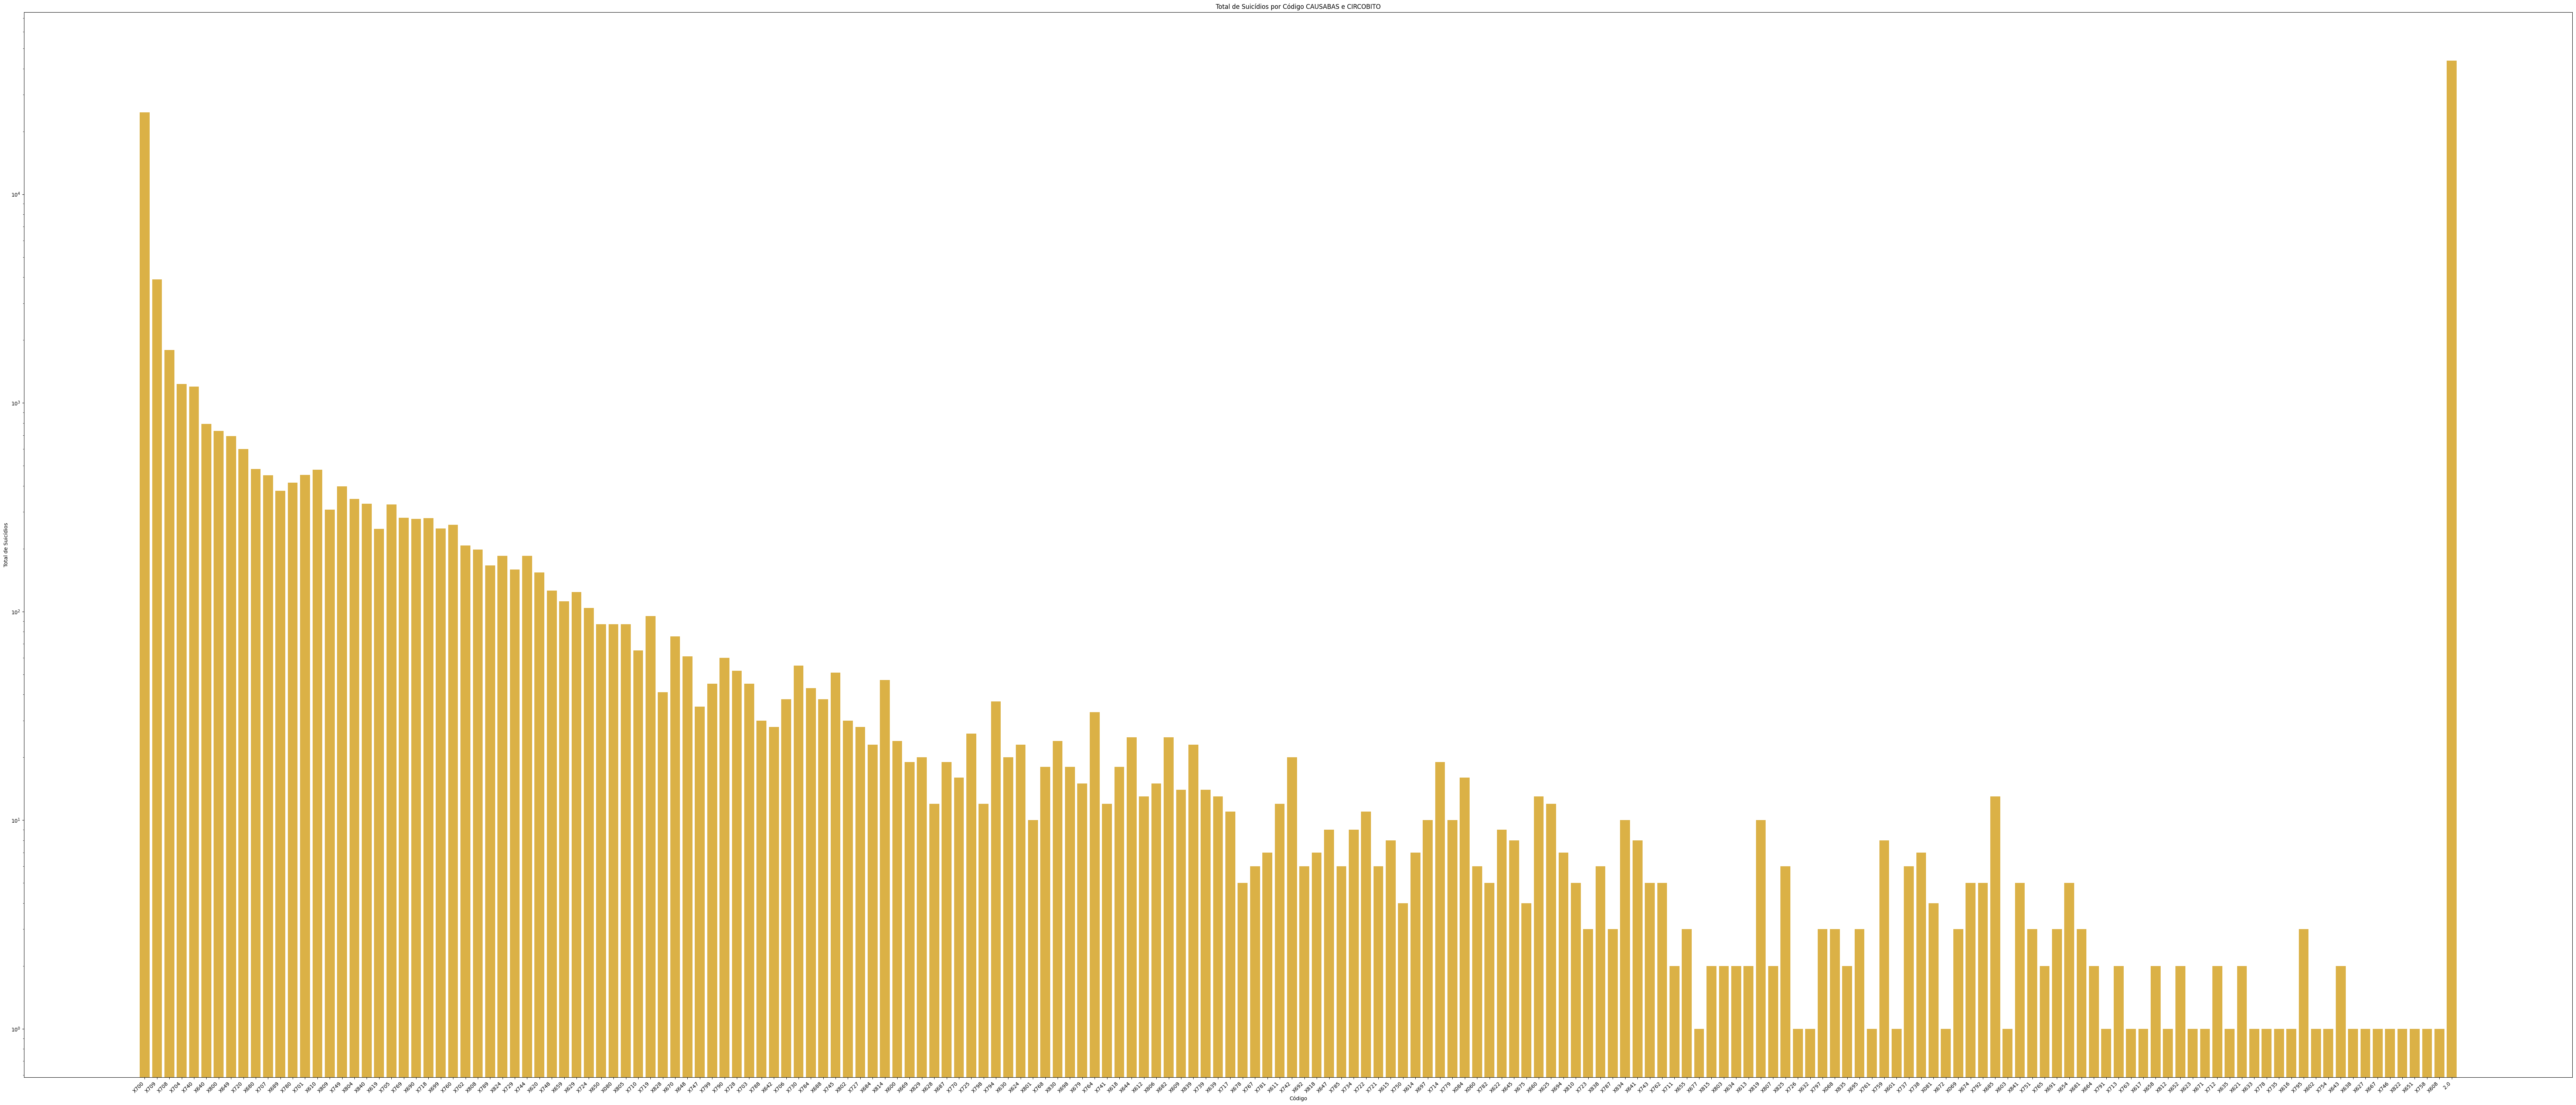

In [12]:
# Combine both total_counts_causa and total_counts_circo dictionaries
total_counts_combined = {**total_counts_causa, **total_counts_circo}

# Extract the codes and counts
codes = list(total_counts_combined.keys())
counts = list(total_counts_combined.values())

# Convert codes to strings
codes = [str(code) for code in codes]

# Plotting
plt.figure(figsize=(70, 30))

# Plot bars for CAUSABAS and CIRCOBITO separately
plt.bar(codes, counts, color='skyblue', label='CAUSABAS')
plt.bar(codes, counts, color='orange', label='CIRCOBITO', alpha=0.7)

plt.xlabel('Código')
plt.ylabel('Total de Suicídios')
plt.title('Total de Suicídios por Código CAUSABAS e CIRCOBITO')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels


# Set a logarithmic scale for the y-axis
plt.yscale('log')

plt.show()


## Onde CIRCOBITO é considerado Suicídio, qual CID foi registrado?


In [13]:
import pandas as pd

# Assuming your DataFrames are named df21, df22, and df23

# Filter each DataFrame where CIROBITO is equal to 2 or 2.0
filtered_df21 = df21[df21['CIRCOBITO'] == 2.0]
filtered_df22 = df22[df22['CIRCOBITO'] == 2.0]
filtered_df23 = df23[df23['CIRCOBITO'] == 2.0]

# Concatenate the filtered DataFrames into a single DataFrame
filtered_combined_df = pd.concat([filtered_df21, filtered_df22, filtered_df23])

# Calculate the total occurrences of each CAUSABAS code
causabas_counts = filtered_combined_df['CAUSABAS'].value_counts()

print("Total occurrences of each CAUSABAS code where CIROBITO is equal to 2 or 2.0:")
print(causabas_counts)


Total occurrences of each CAUSABAS code where CIROBITO is equal to 2 or 2.0:
CAUSABAS
X700    24074
X709     3715
X708     1746
X704     1203
X740     1172
X800      710
X640      676
X720      591
X649      487
X680      466
X610      453
X707      439
X701      430
X780      393
X849      376
X749      361
X689      345
X804      336
X705      323
X840      318
X809      286
X690      266
X769      262
X718      257
X760      251
X619      228
X699      214
X702      197
X808      195
X744      179
X824      170
X729      153
X789      147
X748      119
X724      102
X620       85
X805       84
X670       75
X719       70
X844       67
X710       60
X790       57
X730       53
X745       51
X648       50
X728       50
X814       45
X848       43
X703       43
X828       39
X784       38
X706       38
X629       36
X799       36
X688       36
X747       33
X764       30
X802       30
X727       28
X788       26
X794       26
X725       25
X600       23
X830       23
X642       22
X659

In [14]:
import pandas as pd

# Supondo que você tenha uma lista de anos chamada anos
# e DataFrames df21, df22 e df33

# Lista para armazenar todos os DataFrames
dfs = []

# Loop pelos anos
for ano in anos:
    # Obter o DataFrame para o ano atual
    df = globals()['df' + ano]

    # Adicionar o DataFrame à lista
    dfs.append(df)

# Concatenar todos os DataFrames em um
combined_df = pd.concat(dfs)

# Filtrar o DataFrame combinado com base em CIRCOBITO e nos códigos CAUSABAS
filtered_df = combined_df[(combined_df['CIRCOBITO'] == 2) & (combined_df['CAUSABAS'].isin(codigos_suicidio))]

# Realizar análise cruzada para o DataFrame filtrado
crosstab_result = pd.crosstab(filtered_df['CAUSABAS'], filtered_df['CIRCOBITO'])

# Imprimir o resultado da análise cruzada
print("Análise cruzada de CAUSABAS vs CIRCOBITO:")
print(crosstab_result)


Análise cruzada de CAUSABAS vs CIRCOBITO:
CIRCOBITO    2.0
CAUSABAS        
X600          23
X601           1
X602           1
X609          12
X610         453
X611          12
X612          12
X613           1
X614           6
X615           7
X616           1
X617           1
X618          18
X619         228
X620          85
X621           1
X622           7
X624          10
X625           6
X628           6
X629          36
X630          20
X632           1
X634           1
X635           1
X638           1
X639          10
X640         676
X641           6
X642          22
X644          12
X645           7
X647           6
X648          50
X649         487
X650          18
X654           3
X659          22
X660          10
X664           1
X667           1
X669          14
X670          75
X671           1
X672           1
X674           4
X675           4
X678           5
X679          13
X680         466
X681           3
X682          22
X684          22
X685          13
X687  

In [15]:
# Função para calcular o total de ocorrências
def calcular_total(dataframe):
    return dataframe.sum().sum()

# Calcular o total de ocorrências
total_ocorrencias = calcular_total(crosstab_result)

# Imprimir o total de ocorrências
print("Total de ocorrências:", total_ocorrencias)

Total de ocorrências: 43200
